# kMeans, Hierarchical and DBSCAN Clustering on Online Retail Dataset

**Online Retail dataset is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.**

- Clustering or cluster analysis is an unsupervised learning problem. Our aim is to apply different clustering algorithms to discover interesting patterns in data, such as groups of customers based on their behavior.

### Step 1 : Reading and Understanding Data

In [2]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv("C:\\Users\\Sara\\Downloads\\archive (25)\\OnlineRetail.csv",encoding="ISO-8859-1", header=0)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
# shape of df
df.shape

(541909, 8)

In [5]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# df description
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Step 2 : Data Cleansing

In [7]:
# Finding the number of Missing values in each column
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# Calculating the Missing Values % contribution in DF
df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

- **Since we have sufficiently large amount of data, we will drop the rows with null values for better results**

In [9]:
# Droping rows having missing values
df = df.dropna()
df.shape

(406829, 8)

In [10]:
# Changing the datatype of Customer Id as per Business understanding
df['CustomerID'] = df['CustomerID'].astype(str)

In [11]:
df["Total_price"]=df["Quantity"]*df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


### Step 3 : Exploratory Data Analysis

#### Total sales and quantites sold at each country

In [13]:
country_df = df.groupby(['Country']).sum()
country_df.sort_values('Total_price',ascending=False,inplace=True)
country_df.head()

,Quantity,UnitPrice,Total_price
Country,,,
United Kingdom,4008533,1.178277e+06,6.767873e+06
Netherlands,200128,6.492550e+03,2.846615e+05
EIRE,136329,3.825358e+04,2.502852e+05
Germany,117448,3.766600e+04,2.216982e+05
France,109848,4.287124e+04,1.967128e+05


#### Top 10 customers sales over all countries sorted by Total_price

In [14]:
avg_quan = df[['Quantity','Total_price','Country','InvoiceNo','CustomerID']]
avg_sum = avg_quan.groupby(['Country','CustomerID']).sum() 
avg_sum.sort_values('Total_price',ascending=False).head(10)

Quantity  Total_price
Country        CustomerID                       
Netherlands    14646.0       196719    279489.02
United Kingdom 18102.0        64122    256438.49
               17450.0        69029    187482.17
EIRE           14911.0        77180    132572.62
Australia      12415.0        77242    123725.45
EIRE           14156.0        57025    113384.14
United Kingdom 17511.0        63012     88125.38
               16684.0        49390     65892.08
               13694.0        61803     62653.10
               15311.0        37720     59419.34

#### Average of amount paid by the customers overall countries

Text(0.5, 0, 'Country')

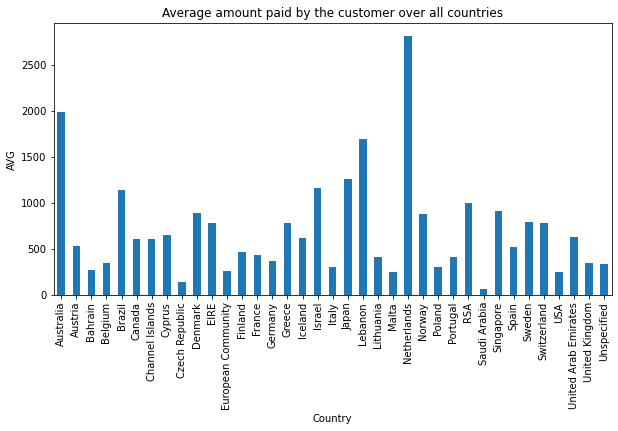

In [15]:
avg_cus = df[['Quantity','Total_price','Country','InvoiceNo']].copy()
x = avg_cus.groupby(['Country','InvoiceNo']).sum()
x['Ones']=1
y = x.groupby('Country').sum()
y['AVG'] = y['Total_price'] / y['Ones']
y['AVG'].plot(kind='bar',figsize=(10,5),title='Average amount paid by the customer over all countries')
plt.ylabel('AVG')
plt.xlabel('Country')

- **The maximum sales are from Netherlands and minimum sales are from Saudi Arabia<br>**

Text(0, 0.5, 'Quantity, total Amount')

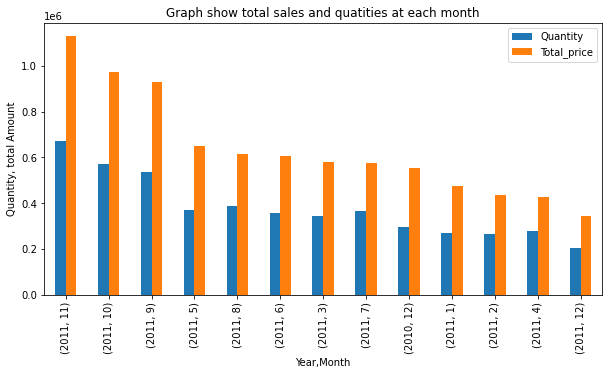

In [16]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')
modifed_df = df[['Quantity','Total_price','InvoiceDate','Country']].copy()
modifed_df['Month'] = modifed_df['InvoiceDate'].dt.month 
modifed_df['Year'] = modifed_df['InvoiceDate'].dt.year 

date_df = modifed_df.groupby(['Year','Month']).sum()
total_values = date_df.sort_values('Total_price',ascending=False)
total_values

total_values.plot(kind='bar',figsize=(10,5),title='Graph show total sales and quatities at each month')
plt.ylabel('Quantity, total Amount')

- **Most sales happened in the month of November of 2011, whereas the least sales happened in the month of December of 2011.** 

### Step 4 : Data Preparation

We are going to analyse the Customers based on below 3 factors:
- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

In [17]:
#deriving Monetary feature from CustomerID and Total_price
monetary = df.groupby('CustomerID')['Total_price'].sum()
monetary= monetary.reset_index()
monetary.head()

,CustomerID,Total_price
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [18]:
#deriving Frequency feature from CustomerID and InvoiceNo
freq = df.groupby('CustomerID')['InvoiceNo'].count()
freq = freq.reset_index()
freq.columns = ['CustomerID', 'Frequency']
freq.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [19]:
# deriving Recency feature 
# Convert to datetime to proper datatype
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')
# Compute the maximum date to know the last transaction date
max_date = max(df['InvoiceDate'])
print(max_date)
# Computing the difference between max date and transaction date
df['Diff'] = max_date - df['InvoiceDate']
df.head()

2011-12-09 12:50:00


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [20]:
# Computing last transaction date to get the recency of customers
rec =df.groupby('CustomerID')['Diff'].min()
rec =rec.reset_index()
rec.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [21]:
# Extracting number of days
rec['Diff'] =rec['Diff'].dt.days
rec.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


- **'Diff' shows the numer of days from when a customer made his large purchase.**

In [22]:
# Merge tha dataframes to get the final RFM dataframe
df1 = pd.merge(monetary,freq, on='CustomerID', how='inner')
df1.head()

,CustomerID,Total_price,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [23]:
df2 = pd.merge(df1,rec, on='CustomerID', how='inner')
df2.head()

,CustomerID,Total_price,Frequency,Diff
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


**Checking For Outliers and removing them if any**

Text(0.5, 0, 'Attributes')

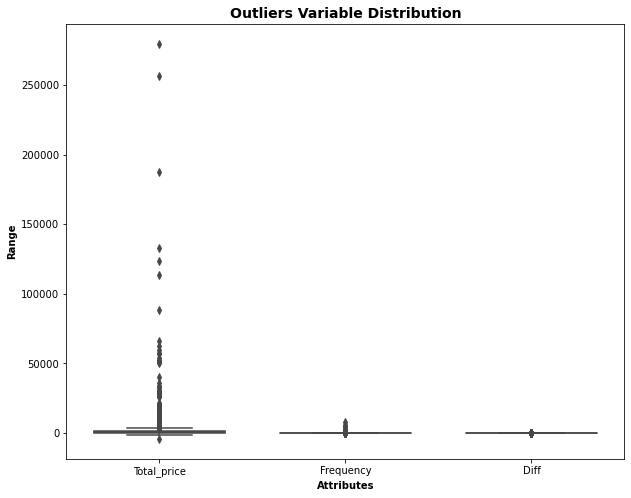

In [24]:
attributes = ['Total_price','Frequency','Diff']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df2[attributes], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [27]:
# Removing (statistical) outliers for Amount
Q1 = df2.Total_price.quantile(0.05)
Q3 = df2.Total_price.quantile(0.95)
IQR = Q3 - Q1
df2 = df2[(df2.Total_price >= Q1 - 1.5*IQR) & (df2.Total_price <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = df2.Frequency.quantile(0.05)
Q3 = df2.Frequency.quantile(0.95)
IQR = Q3 - Q1
df2 = df2[(df2.Frequency >= Q1 - 1.5*IQR) & (df2.Frequency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = df2.Diff.quantile(0.05)
Q3 = df2.Diff.quantile(0.95)
IQR = Q3 - Q1
df2 = df2[(df2.Diff >= Q1 - 1.5*IQR) & (df2.Diff <= Q3 + 1.5*IQR)]

Text(0.5, 0, 'Attributes')

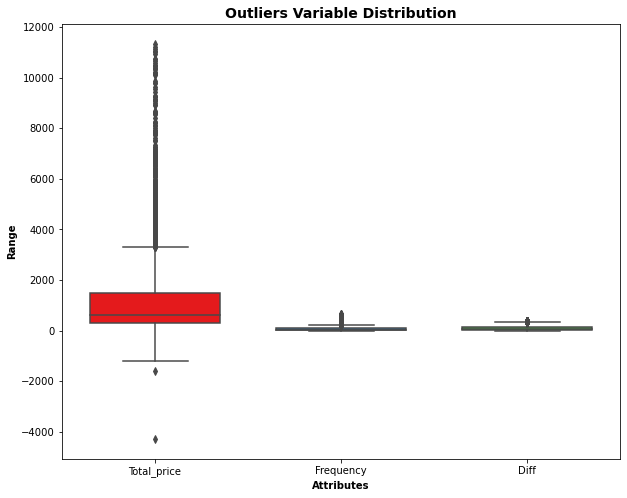

In [28]:
# checking gor outliers
attributes = ['Total_price','Frequency','Diff']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df2[attributes], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

**Rescaling the Attributes as it is important that they have a comparable scale.**

In [29]:
# Rescaling the attributes
df3= df2[['Total_price', 'Frequency', 'Diff']]
scaler = StandardScaler()

# fit_transform
df_scaled = StandardScaler().fit_transform(df3)
print(df_scaled.shape)

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['Total_price', 'Frequency', 'Diff']
df_scaled.head()

(4271, 3)


,Total_price,Frequency,Diff
0,-0.759639,-0.771795,2.295613
1,1.916220,1.117217,-0.910045
2,0.356175,-0.467454,-0.187782
3,0.331534,-0.026685,-0.741847
4,-0.552027,-0.614377,2.137309


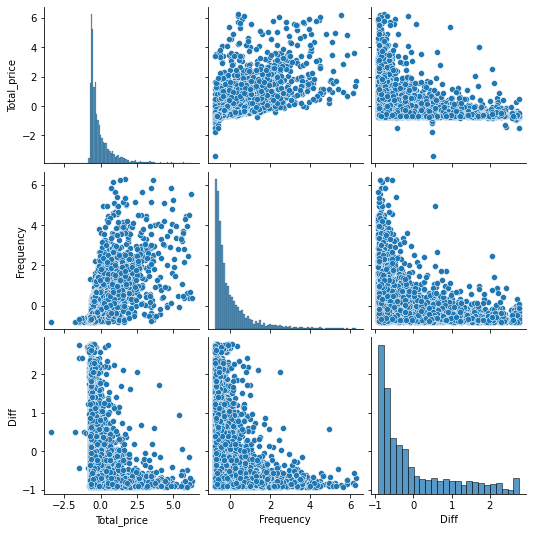

In [30]:
sns.pairplot(df_scaled)

<AxesSubplot:>

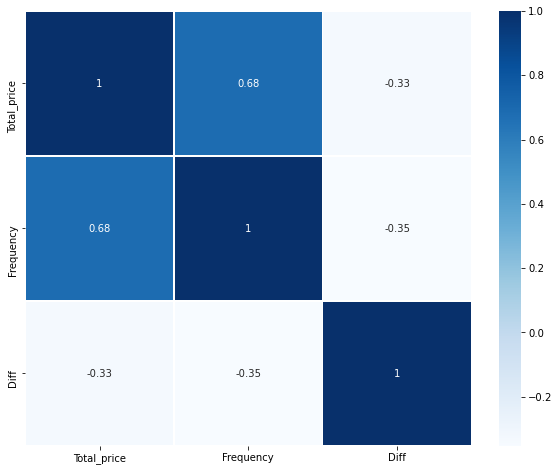

In [93]:
colormap=plt.cm.Blues
plt.figure(figsize=(10,8))
sns.heatmap(df_scaled.corr(),annot=True,cmap=colormap,linewidths=0.2)

- **No two variables are highly correlated with each other.**

### Step 5 : Building the Model

### 1. K-Means Clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

- First we initialize k points, called means, randomly.
- We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
- We repeat the process for a given number of iterations and at the end, we have our clusters.

In [31]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df_scaled)
kmeans.labels_

array([3, 2, 0, ..., 3, 0, 0])

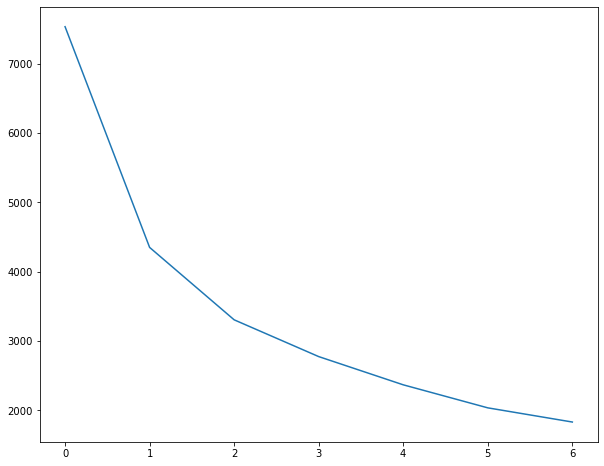

In [32]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

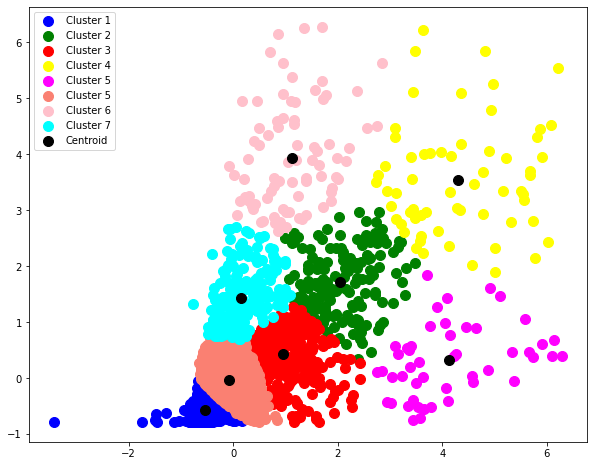

In [33]:
x=df_scaled.iloc[:,0:2].values
y_predict=kmeans.fit_predict(x)
plt.scatter(x[y_predict==0,0],x[y_predict==0,1],s=100,c='blue',label='Cluster 1')
plt.scatter(x[y_predict==1,0],x[y_predict==1,1],s=100,c='green',label='Cluster 2')
plt.scatter(x[y_predict==2,0],x[y_predict==2,1],s=100,c='red',label='Cluster 3')
plt.scatter(x[y_predict==3,0],x[y_predict==3,1],s=100,c='yellow',label='Cluster 4')
plt.scatter(x[y_predict==4,0],x[y_predict==4,1],s=100,c='magenta',label='Cluster 5')
plt.scatter(x[y_predict==5,0],x[y_predict==5,1],s=100,c='salmon',label='Cluster 5')
plt.scatter(x[y_predict==6,0],x[y_predict==6,1],s=100,c='pink',label='Cluster 6')
plt.scatter(x[y_predict==7,0],x[y_predict==7,1],s=100,c='cyan',label='Cluster 7')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroid')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [34]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_scaled)

KMeans(max_iter=50, n_clusters=3)

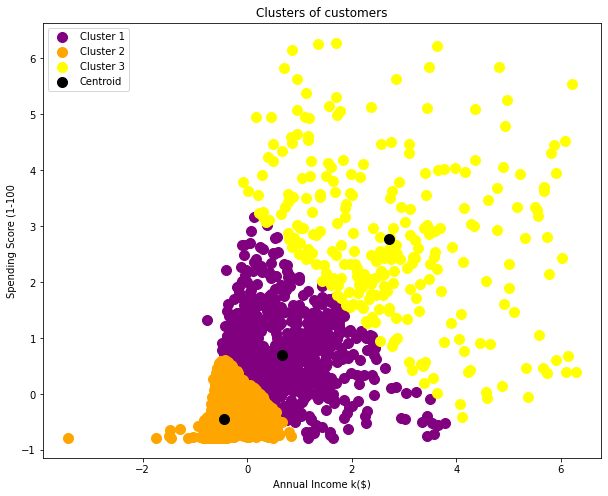

In [35]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_scaled)

x=df_scaled.iloc[:,0:2].values
y_predict=kmeans.fit_predict(x)
plt.scatter(x[y_predict==0,0],x[y_predict==0,1],s=100,c='purple',label='Cluster 1')
plt.scatter(x[y_predict==1,0],x[y_predict==1,1],s=100,c='orange',label='Cluster 2')
plt.scatter(x[y_predict==2,0],x[y_predict==2,1],s=100,c='yellow',label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroid')
plt.title('Clusters of customers')
plt.xlabel('Annual Income k($)')
plt.ylabel('Spending Score (1-100')
plt.legend()
plt.show()

In [75]:
# assign the label
df2['Cluster_Id'] = kmeans.labels_
df2.head()

,CustomerID,Total_price,Frequency,Diff,Cluster_Id,Cluster_Labels
0,12346.0,0.00,2,325,1,0
1,12347.0,4310.00,182,1,0,0
2,12348.0,1797.24,31,74,1,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,309,1,0


<AxesSubplot:xlabel='Cluster_Id', ylabel='Total_price'>

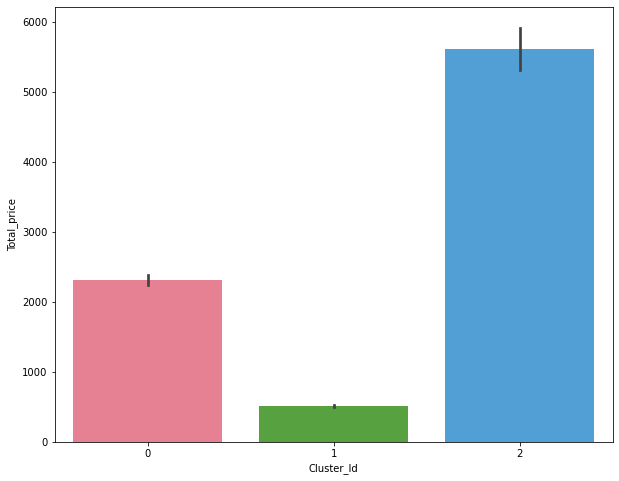

In [76]:
#Violin plot to visualize Cluster Id vs Frequency
sns.barplot(x='Cluster_Id', y='Total_price', data=df2,palette='husl')

- **Customers with Cluster Id 2 are the customers with high amount of transactions as compared to other customers.**

<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

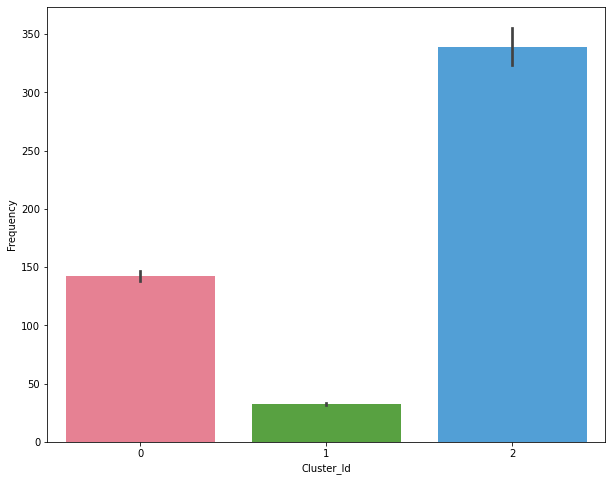

In [77]:
# Box plot to visualize Cluster Id vs Frequency
sns.barplot(x='Cluster_Id', y='Frequency', data=df2,palette='husl')

- **Customers with Cluster Id 2 are frequent buyers.**

<AxesSubplot:xlabel='Cluster_Id', ylabel='Diff'>

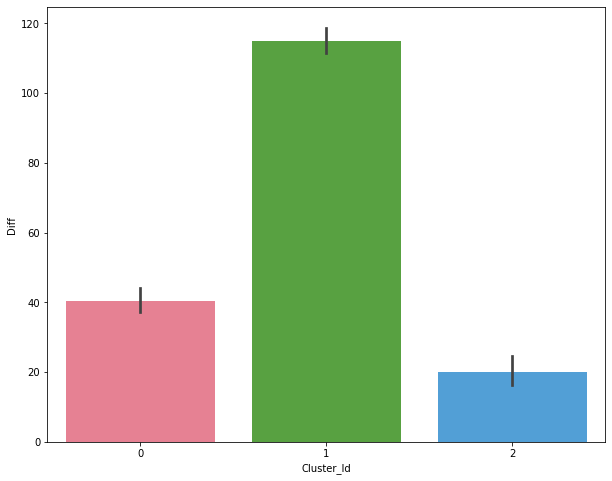

In [78]:
# Box plot to visualize Cluster Id vs Recency
sns.barplot(x='Cluster_Id', y='Diff', data=df2,palette='husl')

- **Customers with Cluster Id 1 are not recent buyers and hence least of importance from business point of view.**

### 2. Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,
- Divisive
- Agglomerative.

**Single Linkage<br>**

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.

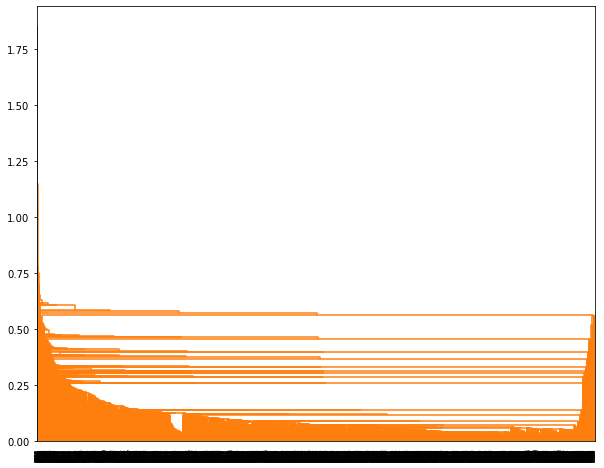

In [40]:
# Single linkage: 

single= linkage(df_scaled, method="single", metric='euclidean')
dendrogram(single)
plt.show()



**Complete Linkage<br>**

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.

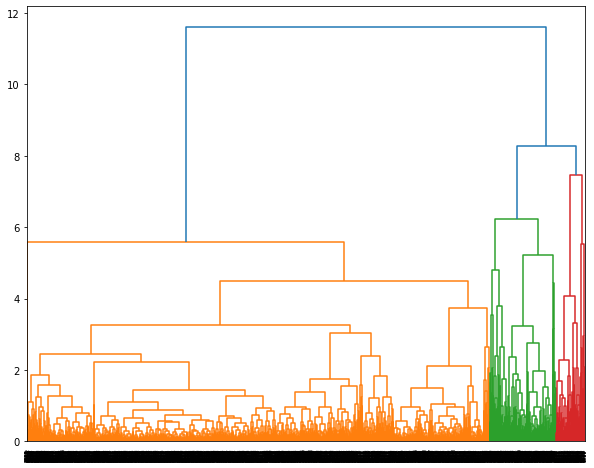

In [41]:
# Complete linkage

complete = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(complete)
plt.show()

**Average Linkage<br>**

In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster. For example, the distance between clusters “r” and “s” to the left is equal to the average length each arrow between connecting the points of one cluster to the other.

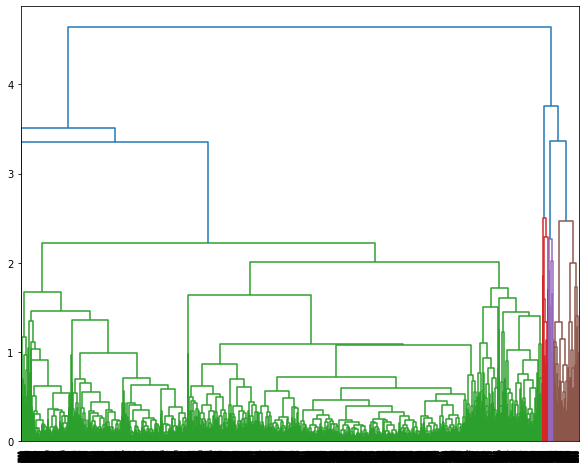

In [42]:
# Average linkage

average = linkage(df_scaled, method="average", metric='euclidean')
dendrogram(average)
plt.show()

#### Cutting the Dendrogram based on K

In [79]:
# 3 clusters
cluster_labels = cut_tree(average, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
# Assign cluster labels

df2['Cluster_Labels'] = cluster_labels
df2.head()

,CustomerID,Total_price,Frequency,Diff,Cluster_Id,Cluster_Labels
0,12346.0,0.00,2,325,1,0
1,12347.0,4310.00,182,1,0,0
2,12348.0,1797.24,31,74,1,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,309,1,0


<AxesSubplot:xlabel='Cluster_Labels', ylabel='Total_price'>

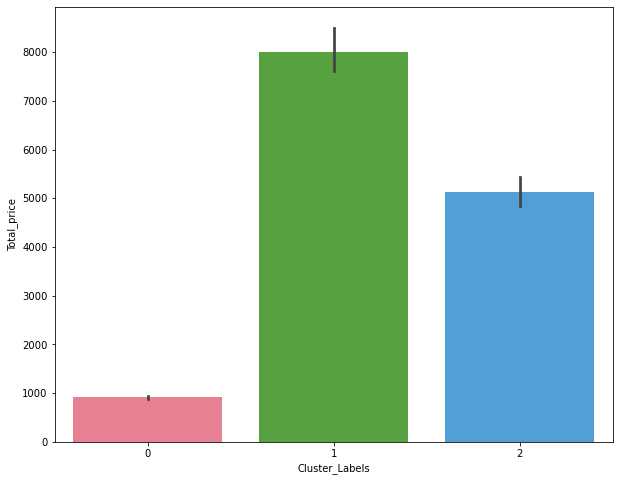

In [81]:
# Plot Cluster Id vs Total_price
sns.barplot(x='Cluster_Labels', y='Total_price', data=df2,palette='husl')

- **Customers with Cluster_Labels 1 are the customers with high amount of transactions as compared to other customers.**

<AxesSubplot:xlabel='Cluster_Labels', ylabel='Frequency'>

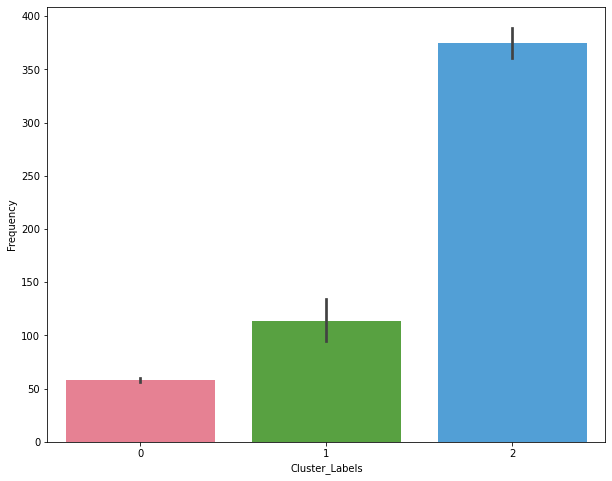

In [82]:
# Plot Cluster Id vs Frequency
sns.barplot(x='Cluster_Labels', y='Frequency', data=df2,palette='husl')

- **Customers with Cluster_Labels 2 are frequent buyers.**

<AxesSubplot:xlabel='Cluster_Labels', ylabel='Diff'>

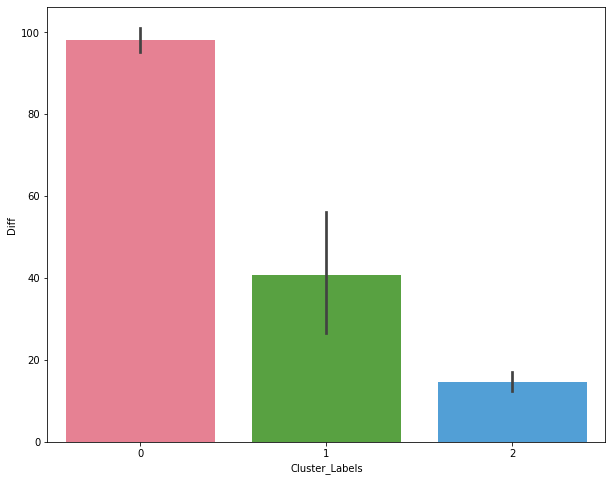

In [83]:
# Plot Cluster Id vs Diff
sns.barplot(x='Cluster_Labels', y='Diff', data=df2,palette='husl')

- **Customers with Cluster_Labels 0 are not recent buyers and hence least of importance from business point of view.**

### 3. DBSCAN  Clustering

**Density-Based spatial Clustering of Applications with Noise (DBSCAN)** is a clustering method where lusters are dense regions in the data space, separated by regions of the lower density of points. The DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”. The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points.

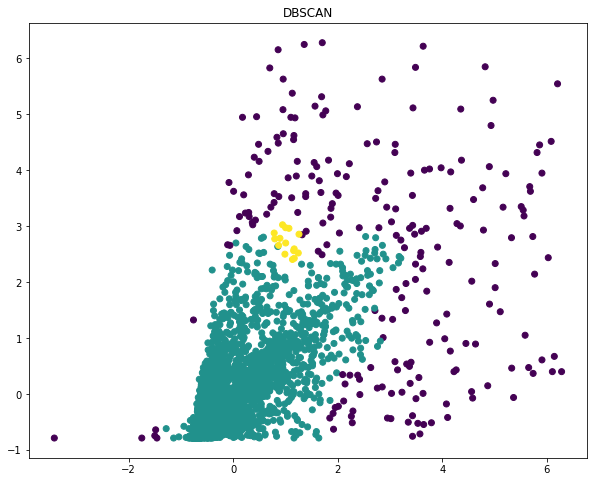

In [49]:
from sklearn.cluster import DBSCAN
x=df_scaled.iloc[:,0:2].values
def dbscan(x, eps, min_samples):
    ss = StandardScaler()
    x = ss.fit_transform(x)
    db = DBSCAN(eps=eps, min_samples=min_samples,metric='euclidean')
    db.fit(x)
    y_pred = db.fit_predict(x)
    plt.scatter(x[:,0], x[:,1],c=y_pred)
    plt.title("DBSCAN")
dbscan(x,eps=0.3,min_samples=10)

In [84]:
# assign the label
db = DBSCAN(eps=0.3, min_samples=10,metric='euclidean')
db.fit(x)
df2['Cluster_Id'] = db.labels_
df2.head()

,CustomerID,Total_price,Frequency,Diff,Cluster_Id,Cluster_Labels
0,12346.0,0.00,2,325,0,0
1,12347.0,4310.00,182,1,0,0
2,12348.0,1797.24,31,74,0,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,309,0,0


<AxesSubplot:xlabel='Cluster_Id', ylabel='Total_price'>

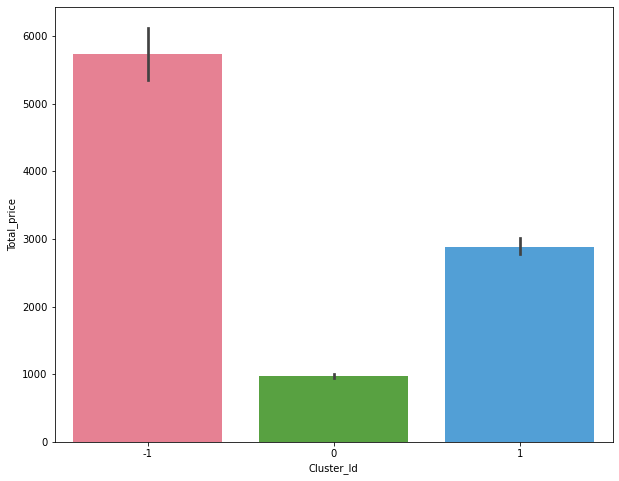

In [85]:
#Violin plot to visualize Cluster Id vs Frequency
sns.barplot(x='Cluster_Id', y='Total_price', data=df2,palette='husl')

- **Customers with Cluster_Labels -1 are the customers with high amount of transactions as compared to other customers.**

<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

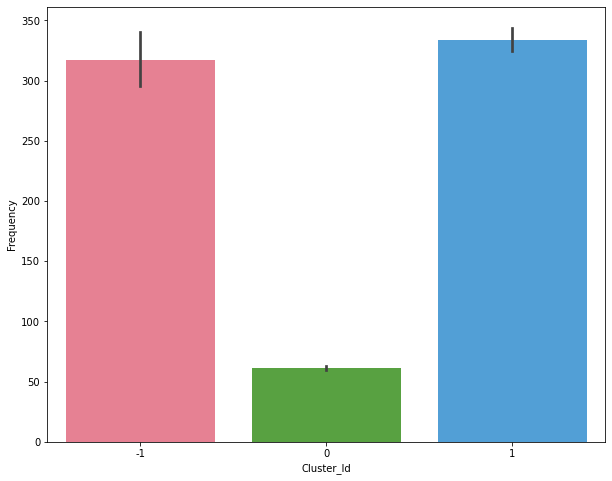

In [86]:
#Violin plot to visualize Cluster Id vs Frequency
sns.barplot(x='Cluster_Id', y='Frequency', data=df2,palette='husl')

- **Customers with Cluster_Labels 1 are frequent buyers.**


<AxesSubplot:xlabel='Cluster_Id', ylabel='Diff'>

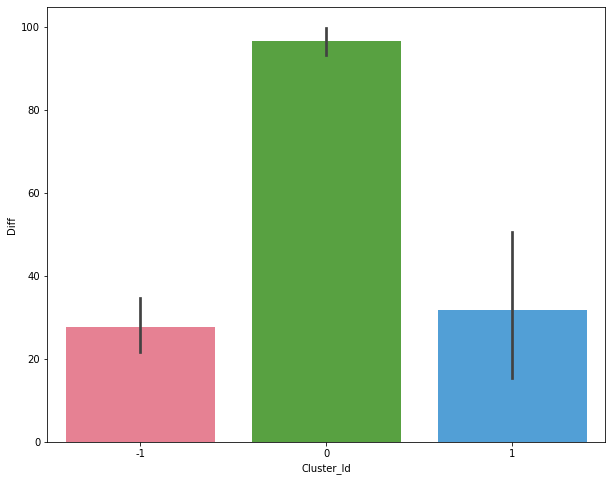

In [87]:
#Violin plot to visualize Cluster Id vs Frequency
sns.barplot(x='Cluster_Id', y='Diff', data=df2,palette='husl')

- **Customers with Cluster_Labels 0 are not recent buyers and hence least of importance from business point of view.**

<a id="5"></a> <br>
## Step 6 : Final Analysis

## Inference:
**K-Means Clustering with 3 Cluster Ids:**
- Customers with Cluster Id 2 are the customers with high amount of transactions as compared to other customers.
- Customers with Cluster Id 2 are frequent buyers.
- Customers with Cluster Id 1 are not recent buyers and hence least of importance from business point of view.

**Hierarchical Clustering with 3 Cluster Labels:**
- Customers with Cluster_Labels 1 are the customers with high amount of transactions as compared to other customers.
- Customers with Cluster_Labels 2 are frequent buyers.
- Customers with Cluster_Labels 0 are not recent buyers and hence least of importance from business point of view.

**DBSCAN Clustering with 3 Cluster Labels:**
- Customers with Cluster_Labels -1 are the customers with high amount of transactions as compared to other customers.
- Customers with Cluster_Labels 1 are frequent buyers.
- Customers with Cluster_Labels 0 are not recent buyers and hence least of importance from business point of view.